# ElasticNet Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [2]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Zadanie 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

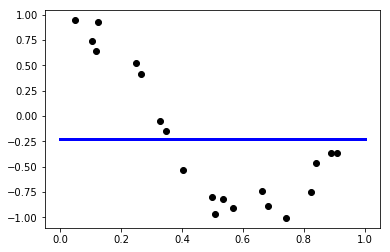

In [4]:
clf = ElasticNet(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


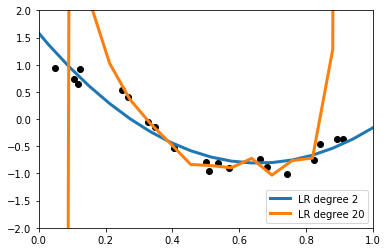

In [5]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 100))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 100))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Ridge Regression) dla wielomianów o stopniu **20**
* regresję (Lasso Regression) dla wielomianów o stopniu **20**
* regresję (Lasso ElasticNet) dla wielomianów o stopniu **20**



# Zadanie 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2 
- regrsji wielomianowej stopnia 5 
- regrsji wielomianowej stopnia 25  
- regrsji ElasticNet wielomianowej stopnia 2 alpha=10.0
- regrsji ElasticNet wielomianowej stopnia 5 alpha=10.0
- regrsji ElasticNet wielomianowej stopnia 25 alpha=10.0 

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [13]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                    'elasticnet__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=False)
grid.fit(x, y)
grid.best_params_

{'elasticnet__alpha': 0.1, 'polynomialfeatures__degree': 1}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [14]:
import pandas as pd
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
